# Jarvis march algorithm

Use the cell below for all python code needed to realise the Jarvis march algorithm (including any auxiliary data structures and functions you might need). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [8]:
def jarvismarch(inputSet):
    if checkValidnum(inputSet):
        outputSet = []
        startPoint = leftMostPoint(inputSet)
        outputSet.append(startPoint)
        current = startPoint
        collPoints = []
        while (True):
            if startPoint == inputSet[0]:
                nextPoint = inputSet[inputSet.index(startPoint)+1]
            else:
                nextPoint = inputSet[0]
            for point in inputSet:
                if(point!=current and point!=nextPoint):
                    currVec = [nextPoint[0]-current[0],nextPoint[1]-current[1]]
                    testVec = [point[0]-current[0],point[1]-current[1]]
                    cp = crossProduct(currVec,testVec)
                    if cp > 0:
                        nextPoint = point
                        collPoints = []
                    elif cp == 0:
                        if(smallerMag(currVec,testVec) == currVec):
                            collPoints.append(nextPoint)
                            nextPoint = point
                        else:
                            collPoints.append(point)
            for point in collPoints:
                outputSet.append(point)
            if nextPoint == startPoint:
                break
            outputSet.append(nextPoint)
            current = nextPoint
        return outputSet
    else:
        return inputSet


def leftMostPoint(inputSet):
    result = inputSet[0]
    for point in inputSet:
        if point[0] < result[0]:
            result = point
    return result

def crossProduct(vector1, vector2):
    return ((vector1[0]*vector2[1])-(vector2[0]*vector1[1]))

def smallerMag(vector1, vector2):
    mag1 = ((vector1[0])**2 + (vector1[1])**2)**0.5
    mag2 = ((vector2[0])**2 + (vector2[1])**2)**0.5
    if mag1 < mag2:
        return vector1
    else:
        return vector2

def checkValidnum(inputSet):
    if len(inputSet) < 3:
        return False
    else:
        return True



print(jarvismarch([[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]))



[[1, 1], [1, 4], [1, 5], [3, 5], [4, 4], [3, 1]]


Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

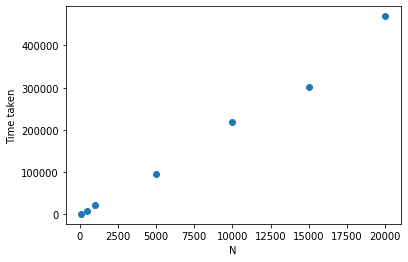

In [9]:
import random
import math
from matplotlib import pyplot as plt
#code for random data generation
def randomPoints(n):
    inputSet = []
    for i in range(n):
        x = random.randint(0,32767)
        y = random.randint(0,32767)
        point = [x,y]
        inputSet.append(point)
    return inputSet

def averageData():
    n_values = [100,500,1000,5000,10000,15000,20000]
    times = []
    for n in n_values:
        points = randomPoints(n)
        time = timeTaken(points)
        times.append(time)
    plt.scatter(n_values,times)
    plt.xlabel('N')
    plt.ylabel('Time taken')
    plt.show()

averageData()



#code for worst case data generation

rad_of_circle = 1600

def generate_points_on_circle(no_of_points):
    xs,ys = [], []
    n = no_of_points
    r = rad_of_circle
    pi = math.pi
    for i in range(1, n+1):
        x = r*math.cos((2*pi)/(n) * i) + r
        y = r*math.sin((2*pi)/(n) * i) + r
        xs.append(x)
        ys.append(y) 
    return xs, ys

def worst_case_points(n):
  xs, ys= generate_points_on_circle(n)
  point_list = list(zip(xs,ys))
  for i in range(0, len(point_list)):
    point_list[i] = [point_list[i][0],point_list[i][1]]

  return point_list

print(randomPoints(100))

Use the cell below for all python code needed to test the `jarvismarch()` function on the data generated above.

In [10]:
import timeit
def timeTaken(points):
    t0 = timeit.default_timer()
    jarvismarch(points)
    t1 = timeit.default_timer()
    return((t1-t0)*1000000)



#test code



*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

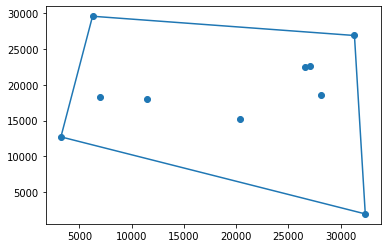

In [11]:
import matplotlib.pyplot as plt

inputSet = randomPoints(10)
outputSet = jarvismarch(inputSet)

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

#inputSet = [[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]
#outputSet = [[1,1], [3,1] , [4, 4], [3,5], [1,5]]

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 